<a href="https://www.kaggle.com/code/meeratif/titanic-ml-model-regression?scriptVersionId=96976134" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
train_file = pd.read_csv('../input/titanic/train.csv')
test_file = pd.read_csv('../input/titanic/test.csv')
show = pd.read_csv('../input/titanic/gender_submission.csv')

In [3]:
def check_data(show, head=10):
    print("***************************** Data Shape *****************************")
    print(show.shape)
    print("***************************** Data Types *****************************")
    print(show.dtypes)
    print("***************************** Data Info *****************************")
    display(show.info)
    print("***************************** Columns *****************************")
    print(show.columns)
    print("***************************** fisrt 10 Records *****************************")
    display(show.head(10))
    print("***************************** last 5 Records *****************************")
    display(show.tail())

check_data(train_file)

***************************** Data Shape *****************************
(891, 12)
***************************** Data Types *****************************
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
***************************** Data Info *****************************


<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

***************************** Columns *****************************
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
***************************** fisrt 10 Records *****************************


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


***************************** last 5 Records *****************************


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


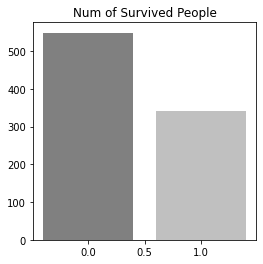

In [4]:
plt.figure(figsize=(4,4))
plt.bar(list(train_file['Survived'].value_counts().keys()), list(train_file['Survived'].value_counts()), color=('grey', 'silver'))
plt.title("Num of Survived People")
plt.show()

In [5]:
train_file['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
sum(train_file['Survived'].isnull())

0

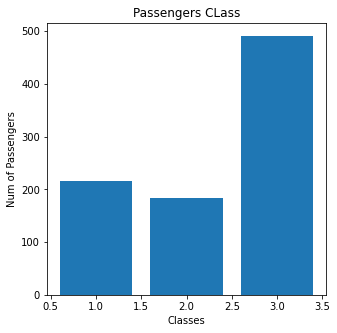

In [7]:
plt.figure(figsize=(5,5))
plt.bar(list(train_file['Pclass'].value_counts().keys()), list(train_file['Pclass'].value_counts()))
plt.title("Passengers CLass")
plt.xlabel("Classes")
plt.ylabel("Num of Passengers")
plt.show()

In [8]:
train_file['Pclass'].value_counts() #Passengers Class

3    491
1    216
2    184
Name: Pclass, dtype: int64

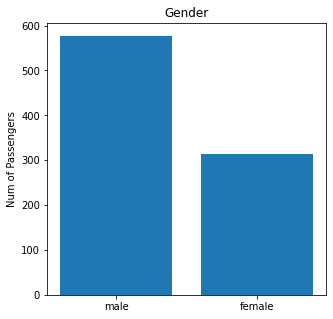

In [9]:
plt.figure(figsize=(5,5))
plt.bar(list(train_file['Sex'].value_counts().keys()), list(train_file['Sex'].value_counts()))
plt.title("Gender")
plt.ylabel("Num of Passengers")
plt.show()

In [10]:
train_file['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

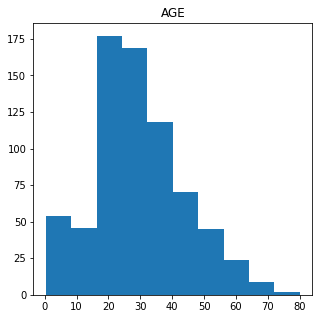

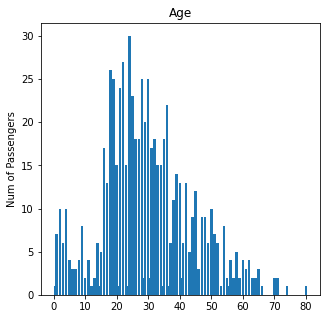

In [11]:
#Historgram
plt.figure(figsize=(5,5))
plt.hist(train_file['Age'])
plt.title("AGE")
plt.show()

#Bar
plt.figure(figsize=(5,5))
plt.bar(list(train_file['Age'].value_counts().keys()), list(train_file['Age'].value_counts()))
plt.title("Age")
plt.ylabel("Num of Passengers")
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

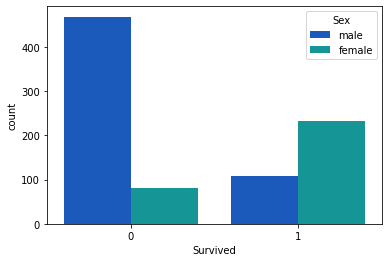

In [12]:
sns.countplot(x="Survived", hue='Sex', data=train_file, palette="winter")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

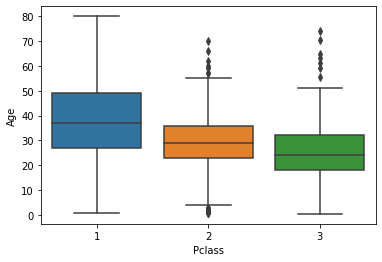

In [13]:
sns.boxplot(x="Pclass", y="Age", data=train_file)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

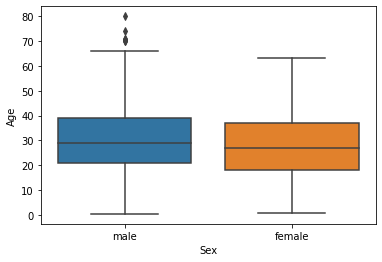

In [14]:
sns.boxplot(x="Sex", y="Age", data=train_file)

In [15]:
train_file.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
sum(train_file['Age'].isnull())

177

In [17]:
pd.get_dummies(train_file['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [18]:
train_file_update = train_file.dropna() # **************** Remove all null values from dataset

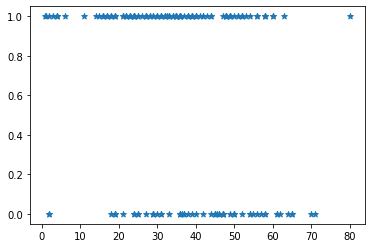

In [19]:
plt.scatter(train_file_update['Age'], train_file_update['Survived'], marker="*")

In [20]:
train_file_update = train_file.dropna() # **************** Remove all null values from dataset

In [21]:
print(sum(train_file_update['Survived'].isnull()))
print(sum(train_file_update['Age'].isnull()))

0
0


In [22]:
# Dependent Variable is survived
# Independent Variable is Age
x_train_data = train_file_update['Age']
y_train_data = train_file_update['Survived']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(train_file_update[['Age']], train_file_update.Survived, test_size=0.1)

In [25]:
print(sum(y_test), sum(y_train))

13 110


In [26]:
x_train

,Age
871,47.0
759,33.0
796,49.0
390,36.0
445,4.0
...,...
394,24.0
319,40.0
645,48.0
325,36.0


In [27]:
from sklearn.linear_model import LogisticRegression

importing Lib for Prediction 
Using Logistics Regression

In [28]:
model = LogisticRegression()

In [29]:
model.fit(x_train, y_train)

LogisticRegression()

In [30]:
x_test

,Age
435,14.0
52,49.0
544,50.0
710,24.0
700,18.0
251,29.0
194,44.0
393,23.0
275,63.0
329,16.0


In [31]:
prediction = model.predict(x_test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [32]:
dic = ({"Age":[], "Test":[]})

dic["Age"] =  x_test
dic["Test"] = prediction

dic

{'Age':       Age
 435  14.0
 52   49.0
 544  50.0
 710  24.0
 700  18.0
 251  29.0
 194  44.0
 393  23.0
 275  63.0
 329  16.0
 75   25.0
 54   65.0
 309  30.0
 659  58.0
 218  32.0
 291  19.0
 492  55.0
 318  31.0
 820  52.0,
 'Test': array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1])}

In [33]:
model.predict_proba(x_test)

array([[0.18387704, 0.81612296],
       [0.42570788, 0.57429212],
       [0.43404688, 0.56595312],
       [0.24048234, 0.75951766],
       [0.20518564, 0.79481436],
       [0.27291034, 0.72708966],
       [0.38473099, 0.61526901],
       [0.23432244, 0.76567756],
       [0.54412997, 0.45587003],
       [0.19430979, 0.80569021],
       [0.24675198, 0.75324802],
       [0.56095347, 0.43904653],
       [0.27971406, 0.72028594],
       [0.50171248, 0.49828752],
       [0.29362802, 0.70637198],
       [0.21079045, 0.78920955],
       [0.4762109 , 0.5237891 ],
       [0.28662054, 0.71337946],
       [0.45083277, 0.54916723]])

In [34]:
model.score(x_test, y_test)

0.7368421052631579

Save in CSV file Formate